Sklearn 常用分类器

参数说明:
1. hidden_layer_sizes :例如hidden_layer_sizes=(50, 50)，表示有两层隐藏层，第一层隐藏层有50个神经元，第二层也有50个神经元。
2. activation :激活函数,{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, 默认relu
- identity：f(x) = x
- logistic：其实就是sigmod,f(x) = 1 / (1 + exp(-x)).
- tanh：f(x) = tanh(x).
- relu：f(x) = max(0, x)
3. solver： {‘lbfgs’, ‘sgd’, ‘adam’}, 默认adam，用来优化权重
- lbfgs：quasi-Newton方法的优化器
- sgd：随机梯度下降
- adam： Kingma, Diederik, and Jimmy Ba提出的机遇随机梯度的优化器
注意：默认solver ‘adam’在相对较大的数据集上效果比较好（几千个样本或者更多），对小数据集来说，lbfgs收敛更快效果也更好。
4. alpha :float,可选的，默认0.0001,正则化项参数
5. batch_size : int , 可选的，默认’auto’,随机优化的minibatches的大小batch_size=min(200,n_samples)，如果solver是’lbfgs’，分类器将不使用minibatch
6. learning_rate :学习率,用于权重更新,只有当solver为’sgd’时使用，{‘constant’，’invscaling’, ‘adaptive’},默认constant
- ‘constant’: 有’learning_rate_init’给定的恒定学习率
- ‘incscaling’：随着时间t使用’power_t’的逆标度指数不断降低学习率learning_rate_ ，effective_learning_rate = learning_rate_init / pow(t, power_t)
- ‘adaptive’：只要训练损耗在下降，就保持学习率为’learning_rate_init’不变，当连续两次不能降低训练损耗或验证分数停止升高至少tol时，将当前学习率除以5.
7. power_t: double, 可选, default 0.5，只有solver=’sgd’时使用，是逆扩展学习率的指数.当learning_rate=’invscaling’，用来更新有效学习率。
8. max_iter: int，可选，默认200，最大迭代次数。
9. random_state:int 或RandomState，可选，默认None，随机数生成器的状态或种子。
10. shuffle: bool，可选，默认True,只有当solver=’sgd’或者‘adam’时使用，判断是否在每次迭代时对样本进行清洗。
11. tol：float, 可选，默认1e-4，优化的容忍度
12. learning_rate_int:double,可选，默认0.001，初始学习率，控制更新权重的补偿，只有当solver=’sgd’ 或’adam’时使用。
14. verbose : bool, 可选, 默认False,是否将过程打印到stdout
15. warm_start : bool, 可选, 默认False,当设置成True，使用之前的解决方法作为初始拟合，否则释放之前的解决方法。
16. momentum : float, 默认 0.9,动量梯度下降更新，设置的范围应该0.0-1.0. 只有solver=’sgd’时使用.
17. nesterovs_momentum : boolean, 默认True, Whether to use Nesterov’s momentum. 只有solver=’sgd’并且momentum > 0使用.
18. early_stopping : bool, 默认False,只有solver=’sgd’或者’adam’时有效,判断当验证效果不再改善的时候是否终止训练，当为True时，自动选出10%的训练数据用于验证并在两步连续迭代改善，低于tol时终止训练。
19. validation_fraction : float, 可选, 默认 0.1,用作早期停止验证的预留训练数据集的比例，早0-1之间，只当early_stopping=True有用
20. beta_1 : float, 可选, 默认0.9，只有solver=’adam’时使用，估计一阶矩向量的指数衰减速率，[0,1)之间
21. beta_2 : float, 可选, 默认0.999,只有solver=’adam’时使用估计二阶矩向量的指数衰减速率[0,1)之间
22. epsilon : float, 可选, 默认1e-8,只有solver=’adam’时使用数值稳定值。
属性说明：
- classes_:每个输出的类标签
- loss_:损失函数计算出来的当前损失值
- coefs_:列表中的第i个元素表示i层的权重矩阵
- intercepts_:列表中第i个元素代表i+1层的偏差向量
- n_iter_ ：迭代次数
- n_layers_:层数
- n_outputs_:输出的个数
- out_activation_:输出激活函数的名称。

一：单一分类器

下面这个例子对一些单一分类器效果做了比较

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import make_blobs

# meta-estimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = {
    'KN': KNeighborsClassifier(3),
    'SVC': SVC(kernel="linear", C=0.025),
    'SVC': SVC(gamma=2, C=1),
    'DT': DecisionTreeClassifier(max_depth=5),
    'RF': RandomForestClassifier(n_estimators=10, max_depth=5, max_features=1),  # clf.feature_importances_
    'ET': ExtraTreesClassifier(n_estimators=10, max_depth=None),  # clf.feature_importances_
    'AB': AdaBoostClassifier(n_estimators=100),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0), # clf.feature_importances_
    'GNB': GaussianNB(),
    'LD': LinearDiscriminantAnalysis(),
    'QD': QuadraticDiscriminantAnalysis()}

    
    
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)


for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y)
    print(name,'\t--> ',scores.mean())

In [ ]:
from keras.models import Sequential
from keras.models import load_model

from keras.layers import Dense
from keras.utils import to_categorical

二、集成分类器

集成分类器有四种：Bagging, Voting, GridSearch, PipeLine。最后一个PipeLine其实是管道技术

1.Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

meta_clf = KNeighborsClassifier() 
bg_clf = BaggingClassifier(meta_clf, max_samples=0.5, max_features=0.5)

2.Voting

In [37]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', weights=[2,1,2])

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores =cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


3.GridSearch

In [ ]:
import numpy as np

from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from numpy.random import randint
import time
# 生成数据
digits = load_digits()
X, y = digits.data, digits.target

# 元分类器
meta_clf = RandomForestClassifier(n_estimators=20)

# =================================================================
# 设置参数
param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, 11),
              "min_samples_split": np.arange(1, 11),
              "min_samples_leaf": np.arange(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# 运行随机搜索 RandomizedSearch
n_iter_search = 20
rs_clf = RandomizedSearchCV(meta_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time.time()
rs_clf.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
#print(rs_clf.grid_scores_)
eans = rs_clf.cv_results_['mean_test_score']
params = rs_clf.cv_results_['params']
print(eans,'\n',params)
# =================================================================
# 设置参数
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# 运行网格搜索 GridSearch
gs_clf = GridSearchCV(meta_clf, param_grid=param_grid)
start = time.time()
gs_clf.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(gs_clf.grid_scores_)))
eans = gs_clf.cv_results_['mean_test_score']
params = gs_clf.cv_results_['params']
print(eans,'\n',params)

4.PipeLine

In [65]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

# 生成数据
X, y = samples_generator.make_classification(n_informative=5, n_redundant=0, random_state=42)

# 定义Pipeline，先方差分析，再SVM
anova_filter = SelectKBest(f_regression, k=5)
clf = svm.SVC(kernel='linear')
pipe = Pipeline([('anova', anova_filter), ('svc', clf)])

# 设置anova的参数k=10，svc的参数C=0.1（用双下划线"__"连接！）
pipe.set_params(anova__k=10, svc__C=.1)
pipe.fit(X, y)

prediction = pipe.predict(X)

pipe.score(X, y)                        

# 得到 anova_filter 选出来的特征
s = pipe.named_steps['anova'].get_support()
print(s)

F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


[False False  True  True False False  True  True False  True False  True
  True False  True False  True  True False False]


In [67]:
import numpy as np

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 定义管道，先降维(pca)，再逻辑回归
pca = decomposition.PCA()
logistic = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 把管道再作为grid_search的estimator
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))

estimator.fit(X_digits, y_digits)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.e-04, 1.e+00, 1.e+04]),
                         'pca__n_components': [20, 40, 64]})

In [1]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X, y = iris.data, iris.target
s=OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)
print(s.shape)

(150,)


F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
F:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


sklearn.multiclass.OneVsRestClassifier ：处理多分类问题

sklearn.multiclass 模块通过将多分类问题化为二分类问题来处理 multiclass 和 multilabel 分类问题。Multitarget regression 也支持。

sklearn.preprocessing.MultiLabelBinarizer(classes=None, sparse_output=False)预处理数据为支持的多标签形式。

OneVsRestClassifier实现用一个分类器对应一个类别， 每个分类器都把其他全部的类别作为相反类别看待。

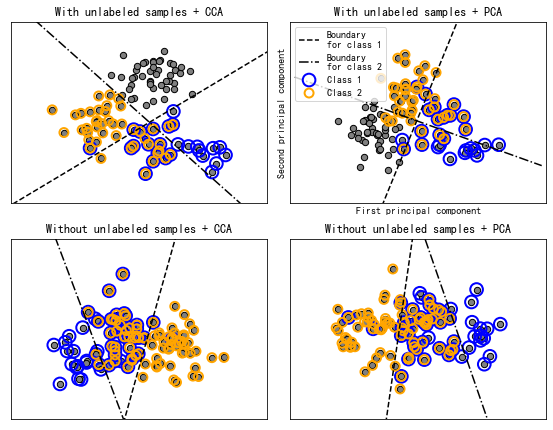

In [22]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
 
 
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)
 
 
def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError
 
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
 
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
 
    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)
 
    plt.subplot(2, 2, subplot)
    plt.title(title)
 
    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')
 
    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())
 
    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")
 
 
plt.figure(figsize=(8, 6))
 
X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)
 
plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")
 
X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)
 
plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")
 
plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

分类性能评估

分类任务常见的评价指标有准确率（Accuracy）、精确率（Precision）、召回率（Recall）、F1 score、ROC曲线（Receiver Operating Characteristic Curve）等。

把正例正确分类为正例，表示为TP（true positive），把正例错误分类为负例，表示为FN（false negative），

把负例正确分类为负例，表示为TN（true negative）， 把负例错误分类为正例，表示为FP（false positive）

精确率和召回率可以从混淆矩阵中计算而来，precision = TP/(TP + FP), recall = TP/(TP +FＮ)。

准确率是分类正确的样本占总样本个数的比例

准确率是分类问题中最简单直观的评价指标，但存在明显的缺陷。比如如果样本中有99%的样本为正样本，那么分类器只需要一直预测为正，就可以得到99%的准确率，但其实际性能是非常低下的。也就是说，当不同类别样本的比例非常不均衡时，占比大的类别往往成为影响准确率的最主要因素。

在多分类问题中一般不直接使用整体的分类准确率，而是使用每个类别下的样本准确率的算术平均作为模型的评估指标。

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))  # 0.5
print(accuracy_score(y_true, y_pred, normalize=False))  # 2

# 在具有二元标签指示符的多标签分类案例中
print(accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2))))  # 0.5
'''
需要注意的是最后一行代码中，y_true为[ 0 1 1 1 ]，y_pred为[ 1 1 1 1 ]，
矩阵的行表示样本，列表示标签（样本具有两个标签，标签0和1共同确定样本类别），
那么这时实际上只有一个样本是预测正确的，因此准确率为1 /2 
'''

0.5
2
0.5


[详细可见](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

精确率

精确率指模型预测为正的样本中实际也为正的样本占被预测为正的样本的比例。

Macro Average:
宏平均是指在计算均值时使每个类别具有相同的权重，最后结果是每个类别的指标的算术平均值。
Micro Average:
微平均是指计算多分类指标时赋予所有类别的每个样本相同的权重，将所有样本合在一起计算各个指标。

‘weighted’: 为每个标签计算指标，并通过各类占比找到它们的加权均值（每个标签的正例数）.它解决了’macro’的标签不平衡问题；它可以产生不在精确率和召回率之间的F-score.

‘samples’: 为每个实例计算指标，找到它们的均值（只在多标签分类的时候有意义，并且和函数accuracy_score不同）.

当average参数为None时，得到的结果是每个类别的precision。

In [3]:
from sklearn.metrics import precision_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(precision_score(y_true, y_pred, average='macro'))  # 0.2222222222222222
print(precision_score(y_true, y_pred, average='micro'))  # 0.3333333333333333
print(precision_score(y_true, y_pred, average='weighted'))  # 0.2222222222222222
print(precision_score(y_true, y_pred, average=None))  # [0.66666667 0.         0.        ]

0.2222222222222222
0.3333333333333333
0.2222222222222222
[0.66666667 0.         0.        ]


召回率

召回率指实际为正的样本中被预测为正的样本所占实际为正的样本的比例。
sklearn中recall_score方法和precision_score方法的参数说明都是一样的

Recall和Precision只有计算公式不同，它们average参数为’macro’，‘micro’，'weighted’和None时的计算方式都是相同的，

In [4]:
from sklearn.metrics import recall_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(recall_score(y_true, y_pred, average='macro'))  # 0.3333333333333333
print(recall_score(y_true, y_pred, average='micro'))  # 0.3333333333333333
print(recall_score(y_true, y_pred, average='weighted'))  # 0.3333333333333333
print(recall_score(y_true, y_pred, average=None))  # [1. 0. 0.]

0.3333333333333333
0.3333333333333333
0.3333333333333333
[1. 0. 0.]


混淆矩阵

横为true label 竖为predict

In [10]:
y_pred = [0, 2, 1, 3,9,9,8,5,8]
y_true = [0, 1, 2, 3,2,6,3,5,9]
# 混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)


array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


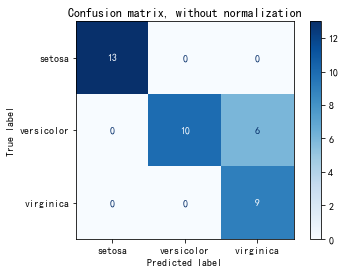

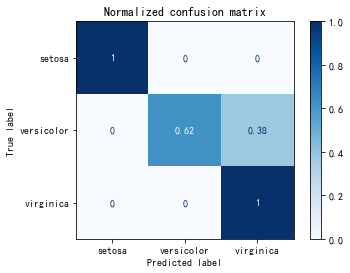

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

分类报告

包含：precision/recall/fi-score/均值/分类个数

In [13]:
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
y_true = [0, 2, 2, 2, 0,1,4,3,4]
y_pred = [0, 0, 2, 2, 0,2,3,4,2]
target_names = ['class 0', 'class 1', 'class 2', 'class 5', 'class 6']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       0.50      0.67      0.57         3
     class 5       0.00      0.00      0.00         1
     class 6       0.00      0.00      0.00         2

    accuracy                           0.44         9
   macro avg       0.23      0.33      0.27         9
weighted avg       0.31      0.44      0.37         9



kappa score

kappa score是一个介于(-1, 1)之间的数. score>0.8意味着好的分类；0或更低意味着不好（实际是随机标签）


In [12]:
from sklearn.metrics import cohen_kappa_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)

0.4285714285714286

P-R曲线

评价一个模型的好坏，不能仅靠精确率或者召回率，最好构建多组精确率和召回率，绘制出模型的P-R曲线。
下面说一下P-R曲线的绘制方法。P-R曲线的横轴是召回率，纵轴是精确率。P-R曲线上的一个点代表着，在某一阈值下，模型将大于该阈值的结果判定为正样本，小于该阈值的结果判定为负样本，此时返回结果对应的召回率和精确率。整条P-R曲线是通过将阈值从高到低移动而生成的。原点附近代表当阈值最大时模型的精确率和召回率。

In [5]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve( y_true, y_scores)
print(precision,'\n', recall,'\n', thresholds)
'''
precisionndarray of shape (n_thresholds + 1,)
Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

recallndarray of shape (n_thresholds + 1,)
Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

thresholdsndarray of shape (n_thresholds,)
Increasing thresholds on the decision function used to compute precision and recall. n_thresholds <= len(np.unique(probas_pred)).
'''

[0.66666667 0.5        1.         1.        ] 
 [1.  0.5 0.5 0. ] 
 [0.35 0.4  0.8 ]


{0, 1}
Average precision-recall score: 0.84


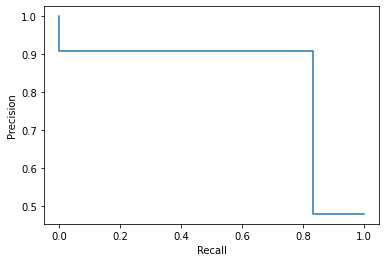

In [14]:
#二分类曲线
from sklearn.datasets import make_classification
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     random_state=0)
print(set(y))
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot() 
average_precision = average_precision_score(y_test, predictions)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

详见文件  plot_precision_recall.ipynb

多分类下的ROC曲线和AUC

(150, 4) (150,)
[0 0 0 0 0 0 0 0 0 0]
{0, 1, 2}
(150,)
[0 0 0 0 0 0 0 0 0 0]


F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

超参数： [23.35721469 23.35721469 23.35721469]
调用函数auc： 0.9945833333333333
手动计算auc： 0.9945833333333333


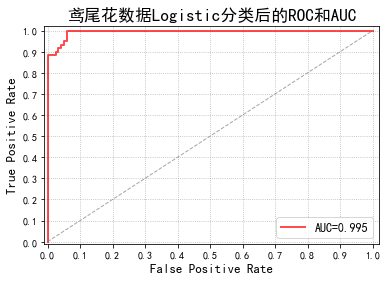

In [9]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn import datasets
if __name__ == '__main__':
    np.random.seed(0)
    
    iris = datasets.load_iris()
    x = iris.data
    y = iris.target
    print(x.shape,y.shape)
    print(y[:10])
    print(set(y))
    
    print(y.shape)
    print(y[:10])
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6, random_state = 0)
    Y = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = Y.shape[1]
    alpha = np.logspace(-2, 2, 20)  #设置超参数范围
    model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')  #使用L2正则化
    model.fit(x_train, y_train)
    print('超参数：', model.C_)
    # 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
    y_score = model.predict_proba(x_test)
    # 1、调用函数计算micro类型的AUC
    print('调用函数auc：', metrics.roc_auc_score(Y, y_score, average='micro'))
    # 2、手动计算micro类型的AUC
    #首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
    fpr, tpr, thresholds = metrics.roc_curve(Y.ravel(),y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print('手动计算auc：', auc)
    #绘图
    mpl.rcParams['font.sans-serif'] = u'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    #FPR就是横坐标,TPR就是纵坐标
    plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
    plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    plt.title(u'鸢尾花数据Logistic分类后的ROC和AUC', fontsize=17)
    plt.show()

详见文件---plot_roc.ipynb

F1 score是精确率和召回率的调和平均值

F1 score越高，说明模型越稳健。

 F1 score的最好值为1，最差值为0. 精确率和召回率对F1 score的相对贡献是相等的. F1 score的计算公式为：
F1 = 2 * (precision * recall) / (precision + recall)
 

In [3]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(f1_score(y_true, y_pred, average='macro'))  # 0.26666666666666666
print(f1_score(y_true, y_pred, average='micro'))  # 0.3333333333333333
print(f1_score(y_true, y_pred, average='weighted'))  # 0.26666666666666666
print(f1_score(y_true, y_pred, average=None))  # [0.8 0.  0. ]

0.26666666666666666
0.3333333333333333
0.26666666666666666
[0.8 0.  0. ]


海明距离

In [2]:
from sklearn.metrics import hamming_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
hamming_loss(y_true, y_pred)


0.25

Jaccard距离

In [72]:
import numpy as np
from sklearn.metrics import jaccard_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
jaccard_score(y_true, y_pred,average='macro')

0.5

铰链损失

铰链损失（Hinge loss）一般用来使“边缘最大化”（maximal margin）。损失取值在0~1之间，当取值为0，表示多分类模型分类完全准确，取值为1表明完全不起作用。

In [25]:
from sklearn.metrics import hinge_loss
y_pred = [0, 1,0,1,1]
y_true = [0, 1,1,0,0]
hinger = hinge_loss(y_true,y_pred)
print(hinger)

1.2


In [ ]:
def Model_evaluation(classifier,X_test, y_test,class_names):
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    predictions = classifier.predict(X_test)
    y_true, y_pred=y_test,predictions
    #accuracy_score
    print('accuracy_score:',accuracy_score(y_true, y_pred))
    print('accuracy_score without normalization:',accuracy_score(y_true, y_pred, normalize=False))

    #hamming_loss
    ham_loss=hamming_loss(y_true, y_pred)
    print('hamming_loss:',ham_loss)

    #cohen_kappa_score---介于(-1, 1)之间的数. score>0.8意味着好的分类；0或更低意味着不好
    ck_score=cohen_kappa_score(y_true, y_pred) #(label除非是你想计算其中的分类子集的kappa系数，否则不需要设置)
    print('cohen_kappa_score:',ck_score)

    #jaccard_score--macro
    print('jaccard_score--macro:',jaccard_score(y_true, y_pred,average='macro'))
    print('jaccard_score--micro:',jaccard_score(y_true, y_pred,average='micro'))
    print('jaccard_score--weighted:',jaccard_score(y_true, y_pred,average='weighted'))
    print('jaccard_score--None:',jaccard_score(y_true, y_pred,average=None))

    #
    print(classification_report(y_test,predictions, target_names=class_names))

    '''

    #precision_score
    print('precision_score--macro:',precision_score(y_true, y_pred, average='macro'))  # 0.2222222222222222
    print('precision_score-micro:',precision_score(y_true, y_pred, average='micro'))  # 0.3333333333333333
    print('precision_score-weighted:',precision_score(y_true, y_pred, average='weighted'))  # 0.2222222222222222
    print('precision_score-None:',precision_score(y_true, y_pred, average=None))  # [0.66666667 0.         0.

    #recall_score
    print('recall_score--macro:',recall_score(y_true, y_pred, average='macro'))  # 0.3333333333333333
    print('recall_score--micro:',recall_score(y_true, y_pred, average='micro'))  # 0.3333333333333333
    print('recall_score--weighted:',recall_score(y_true, y_pred, average='weighted'))  # 0.3333333333333333
    print('recall_score--None:',recall_score(y_true, y_pred, average=None))  # [1. 0. 0.]

    #f1_score
    print('f1_score--macro:',f1_score(y_true, y_pred, average='macro'))  # 0.26666666666666666
    print('f1_score--micro:',f1_score(y_true, y_pred, average='micro'))  # 0.3333333333333333
    print('f1_score--weighted:',f1_score(y_true, y_pred, average='weighted'))  # 0.26666666666666666
    print('f1_score--None:',f1_score(y_true, y_pred, average=None))  # [0.8 0.  0. ]

    '''
    prec_w=precision_score(y_true, y_pred, average='weighted')
    reca_w=recall_score(y_true, y_pred, average='weighted')
    return ham_loss,ck_score,prec_w,reca_w